(c) Juan Gomez 2019. Thanks to Universidad EAFIT for support. This material is part of the course Introduction to Finite Element Analysis

# SOLUTION: Piecewise Interpolation

## By Juan Gomez

In [1]:
%matplotlib notebook        
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import sympy as sym

In [2]:
def LagrangPoly(x, order, i, xi=None):
    if xi == None:
        xi = sym.symbols('x:%d' % (order+1))
    index = list(range(order+1))
    index.pop(i)
    return sym.prod([(x-xi[j])/(xi[i]-xi[j]) for j in index])

### Class activity
#### Problem 1
For the function  $f(x) = {x^3} + 4{x^2} - 10$ in the range $[-1.0, 1.0]$:

* Find values at nodal points corresponding to 4 sub-domains each one with 3 nodal points and using these values implement a local interpolation scheme using 2-nd order interpolation polynomials.

<IPython.core.display.Javascript object>


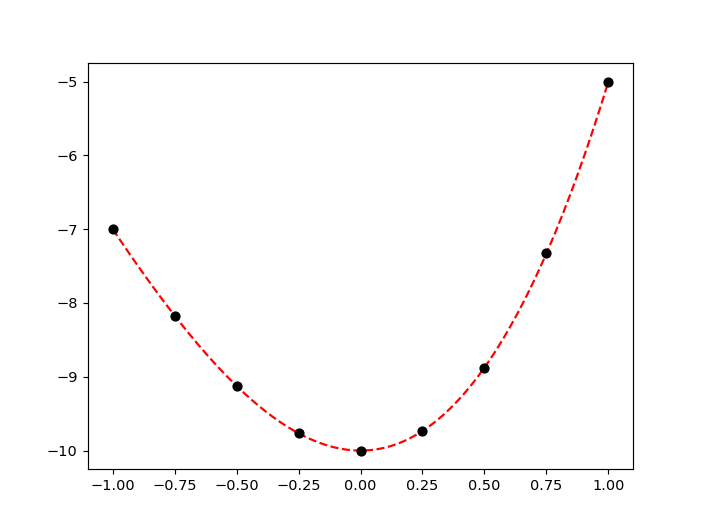

In [3]:
fx = lambda x: x**3 + 4.0*x**2 - 10.0
fdx = lambda x: 3*x**2 + 8.0*x
#
npts = 200
xx = np.linspace(-1, 1, npts)
x_data = np.array([-1, -0.75 , -0.5, -0.25, 0.0, 0.25,  0.5, 0.75, 1])
fd = fx(x_data)

plt.figure(0)
yy = fx(xx)
plt.plot(xx, yy, 'r--')
plt.plot([-1, -0.75 , -0.5, -0.25, 0.0, 0.25,  0.5, 0.75, 1], fd, 'ko')

### Locally based Lagrange polynomials

* Plot the interpolation polynomial in each sub-domain and the corresponding interpolating function $p(x)$.

* In the same plot compare $p(x)$ and $f(x)$.

In [4]:
x = sym.symbols('x')
pol = []
pol.append(sym.simplify(LagrangPoly(x, 2, 0, [-1.0, -0.75 , -0.50])))
pol.append(sym.simplify(LagrangPoly(x, 2, 1, [-1.0, -0.75 , -0.50])))
pol.append(sym.simplify(LagrangPoly(x, 2, 2, [-1.0, -0.75 , -0.50])))
#
pol.append(sym.simplify(LagrangPoly(x, 2, 0, [-0.50, -0.25 , 0.00])))
pol.append(sym.simplify(LagrangPoly(x, 2, 1, [-0.50, -0.25 , 0.00])))
pol.append(sym.simplify(LagrangPoly(x, 2, 2, [-0.50, -0.25 , 0.00])))
#
pol.append(sym.simplify(LagrangPoly(x, 2, 0, [ 0.00, 0.25 ,  0.50])))
pol.append(sym.simplify(LagrangPoly(x, 2, 1, [ 0.00, 0.25 ,  0.50])))
pol.append(sym.simplify(LagrangPoly(x, 2, 2, [ 0.00, 0.25 ,  0.50])))
#
pol.append(sym.simplify(LagrangPoly(x, 2, 0, [ 0.50, 0.75 ,  1.00])))
pol.append(sym.simplify(LagrangPoly(x, 2, 1, [ 0.50, 0.75 ,  1.00])))
pol.append(sym.simplify(LagrangPoly(x, 2, 2, [ 0.50, 0.75 ,  1.00])))
#

<IPython.core.display.Javascript object>


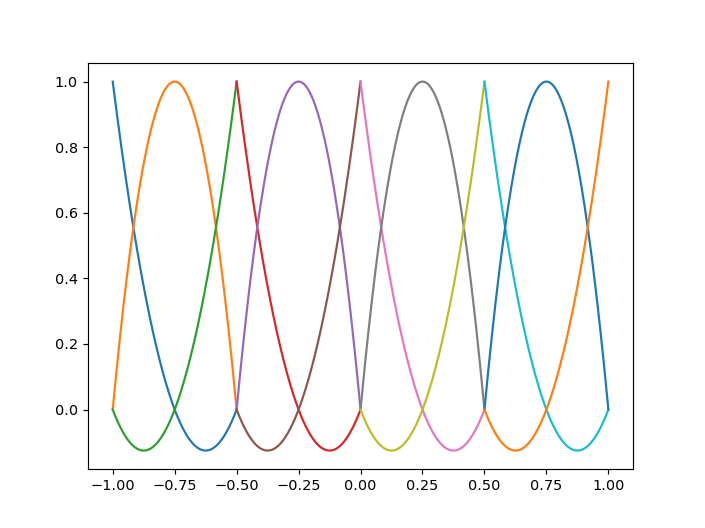

In [5]:
plt.figure(1)
xx = np.linspace(-1, -0.5, npts)
for k in range(3):
    for i in range(npts):
        yy[i] = pol[k].subs([(x, xx[i])])
    plt.plot(xx, yy)
xx = np.linspace(-0.5, 0.0, npts)
for k in range(3):
    for i in range(npts):
        yy[i] = pol[k+3].subs([(x, xx[i])])
    plt.plot(xx, yy)
#
xx = np.linspace(0.0, 0.5, npts)
for k in range(3):
    for i in range(npts):
        yy[i] = pol[k+6].subs([(x, xx[i])])
    plt.plot(xx, yy)
#
xx = np.linspace(0.5, 1.0, npts)
for k in range(3):
    for i in range(npts):
        yy[i] = pol[k+9].subs([(x, xx[i])])
    plt.plot(xx, yy)

<IPython.core.display.Javascript object>


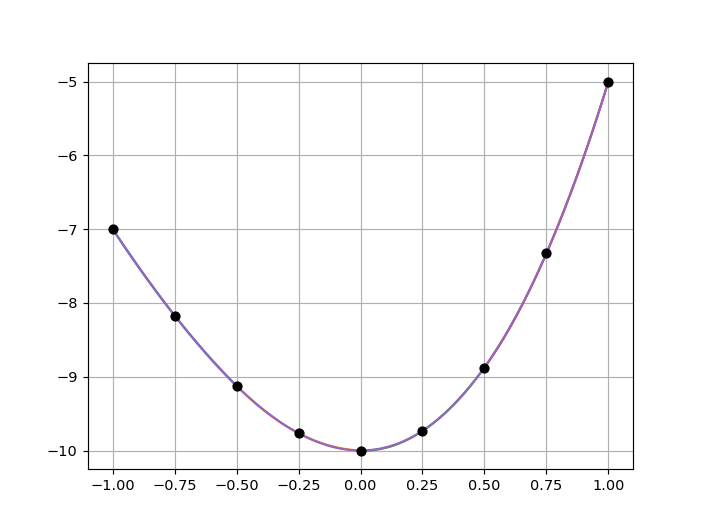

In [6]:
plt.figure(2)
plt.grid()
xx = np.linspace(-1.0, -0.50 , npts)
for i in range(npts):
    yy[i] = fd[0]*pol[0].subs([(x, xx[i])]) + fd[1]*pol[1].subs([(x, xx[i])]) \
          + fd[2]*pol[2].subs([(x, xx[i])])
plt.plot(xx, yy)
#
xx = np.linspace(-0.50, 0.00 , npts)
for i in range(npts):
    yy[i] = fd[2]*pol[3].subs([(x, xx[i])]) + fd[3]*pol[4].subs([(x, xx[i])]) \
          + fd[4]*pol[5].subs([(x, xx[i])])
plt.plot(xx, yy)
#
xx = np.linspace(0.00, 0.50 ,  npts)
for i in range(npts):
    yy[i] = fd[4]*pol[6].subs([(x, xx[i])]) + fd[5]*pol[7].subs([(x, xx[i])]) \
          + fd[6]*pol[8].subs([(x, xx[i])])
plt.plot(xx, yy)
#
xx = np.linspace( 0.50, 1.00 , npts)
for i in range(npts):
    yy[i] = fd[6]*pol[9].subs([(x, xx[i])]) + fd[7]*pol[10].subs([(x, xx[i])]) \
          + fd[8]*pol[11].subs([(x, xx[i])])
plt.plot(xx, yy)
#
xx = np.linspace(-1.0, 1.0, npts)
zz = fx(xx)
plt.plot(xx, zz)
plt.plot([-1, -0.75 , -0.5, -0.25, 0.0, 0.25,  0.5, 0.75, 1], fd, 'ko')

### Continuing from previous question...

Additionally, plot the first derivative of the function obtained from $p(x)$ and $f(x)$.

In [7]:
dpol = []
for j in range(12):
    dpol.append(sym.diff(pol[j], x))

<IPython.core.display.Javascript object>


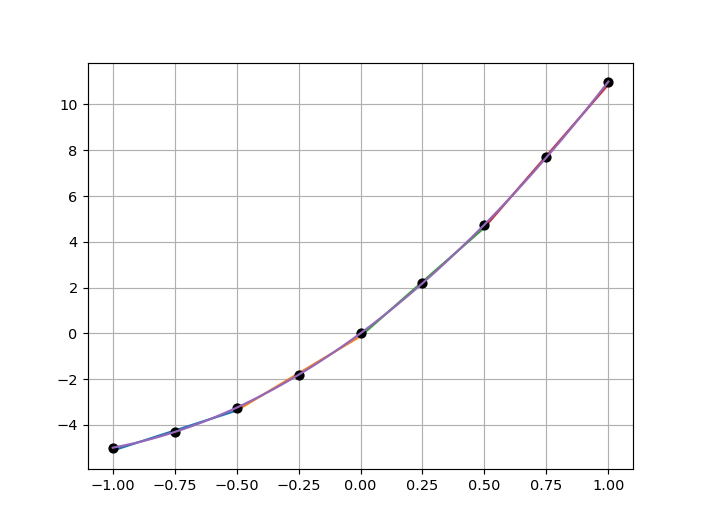

In [8]:
plt.figure(3)
plt.grid()
xx = np.linspace(-1.0, -0.5, npts)
for i in range(npts):
    yy[i] = fd[0]*dpol[0].subs([(x, xx[i])]) + fd[1]*dpol[1].subs([(x, xx[i])]) \
    + fd[2]*dpol[2].subs([(x, xx[i])])
plt.plot(xx, yy)
#
xx = np.linspace(-0.5, 0.0, npts)
for i in range(npts):
    yy[i] = fd[2]*dpol[3].subs([(x, xx[i])]) + fd[3]*dpol[4].subs([(x, xx[i])]) \
    + fd[4]*dpol[5].subs([(x, xx[i])])
plt.plot(xx, yy)
#
xx = np.linspace(0.0, 0.5, npts)
for i in range(npts):
    yy[i] = fd[4]*dpol[6].subs([(x, xx[i])]) + fd[5]*dpol[7].subs([(x, xx[i])]) \
    + fd[6]*dpol[8].subs([(x, xx[i])])
plt.plot(xx, yy)
#
xx = np.linspace(0.5, 1.0, npts)
for i in range(npts):
    yy[i] = fd[6]*dpol[9].subs([(x, xx[i])]) + fd[7]*dpol[10].subs([(x, xx[i])]) \
    + fd[8]*dpol[11].subs([(x, xx[i])])
plt.plot(xx, yy)
#
fc = fdx(x_data)
plt.plot([-1, -0.75 , -0.5, -0.25, 0.0, 0.25,  0.5, 0.75, 1], fc, 'ko')

xx = np.linspace(-1.0, 1.0, npts)
for i in range(npts):
    zz[i] = fdx(xx[i])
plt.plot(xx, zz)

#### Problem 2

For the Runge function defined by:

$$f(x) = \frac{1}{{1 + 25{x^2}}}$$

implement an interpolation scheme using local 1st-order Lagrange polynomials using:
* (i) sub-domains of constant size $\Delta x = 0.2$
* (ii) sub-domains whose size decreases towards the edges of the interval.

Let us interpolate the function using a global scheme first. We will use equidistant nodes (see the array $xl$) and edge-concentrated nodes (see the array $xs$).

In [9]:
x= sym.symbols('x')
fx = lambda x: 1.0/(1.0+25.0*x*x)
#
# Create arrays
#
npts = 200
xx = np.linspace(-1, 1, npts)
yy = np.zeros((npts))
ww = np.zeros((npts))
zz = np.zeros((npts))
xl=np.zeros(11)
xs=np.zeros(11)

<IPython.core.display.Javascript object>


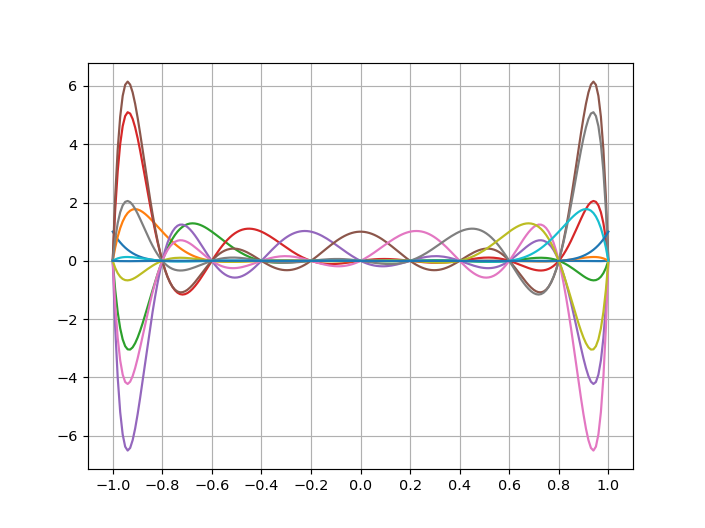

In [10]:
#
# Equidistant nodes
#
xl = np.array([-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
fl=np.array(fx(xl))
#
# Derive Lagrange polynomials using the function LagrangePoly(x,order,point)
# and equidistant nodes.
#
pol = []
polorder=10
for i in range(11):
    pol.append(sym.simplify(LagrangPoly(x,polorder,i,[-1.0,-0.8,-0.6,-0.4,-0.2, 0.0,0.2,0.4,0.6,0.8,1.0])))
#
# Plot the polynomials
#
plt.figure(4)
for k in range(11):
    for i in range(npts):
        yy[i] = pol[k].subs([(x, xx[i])])
    plt.xticks(np.arange(min(xx), max(xx)+1, 0.2))
    plt.grid()
    plt.plot(xx, yy )

The approximation to the function using equidistant nodes looks as follows next:

<IPython.core.display.Javascript object>


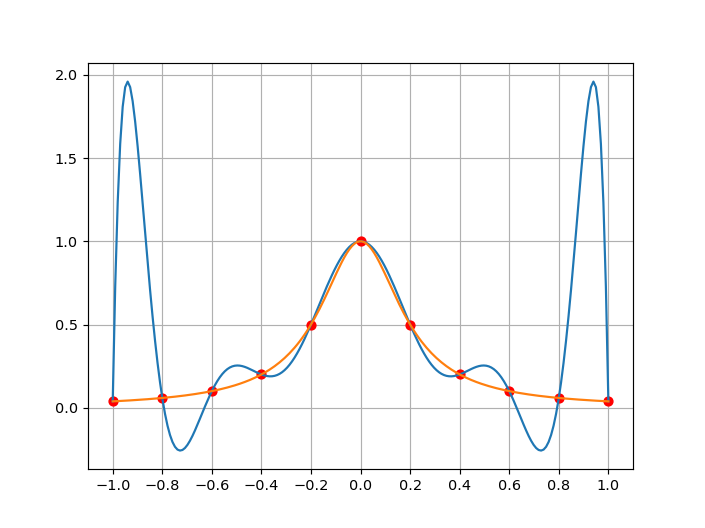

In [11]:
plt.figure(5)
for i in range(npts):
    yy[i] = fl[0 ]*pol[0].subs([(x, xx[i])]) + fl[1]*pol[1].subs([(x, xx[i])]) \
          + fl[2 ]*pol[2].subs([(x, xx[i])]) + fl[3]*pol[3].subs([(x, xx[i])]) \
          + fl[4 ]*pol[4].subs([(x, xx[i])]) + fl[5]*pol[5].subs([(x, xx[i])]) \
          + fl[6 ]*pol[6].subs([(x, xx[i])]) + fl[7]*pol[7].subs([(x, xx[i])]) \
          + fl[8 ]*pol[8].subs([(x, xx[i])]) + fl[9]*pol[9].subs([(x, xx[i])]) \
          + fl[10]*pol[10].subs([(x, xx[i])])
    zz[i]=fx(xx[i])
    
plt.xticks(np.arange(min(xx), max(xx)+1, 0.2))
plt.grid()
plt.plot(xl, fl, 'ro')
plt.plot(xx, yy)
plt.plot(xx, zz)

Now let us repeat the process using as nodal points the roots of Chevyshev polynomials which are concentrated toward the edges of the interval. The independent polynomials now look like shown below.

<IPython.core.display.Javascript object>


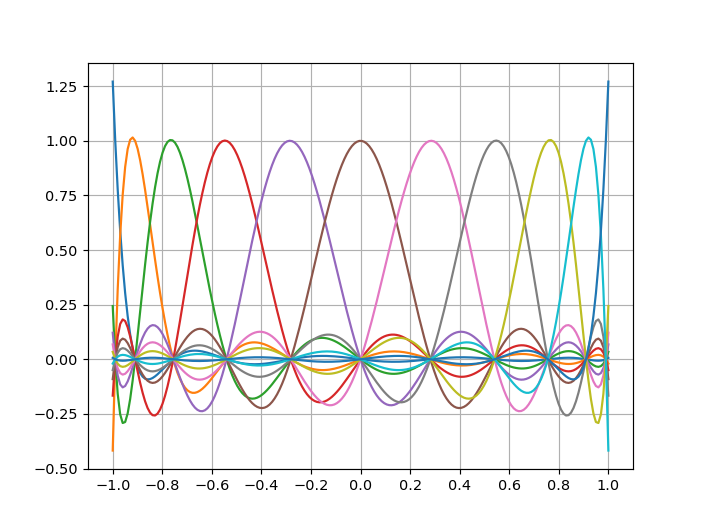

In [12]:
#
# Nodes at Chevyshev roots
#
xs = np.array([-9.89821442e-01 , -9.09631995e-01 , -7.55749574e-01 ,-5.40640817e-01, \
               -2.81732557e-01 , 0               ,2.81732557e-01   ,5.40640817e-01 , \
               7.55749574e-01  , 9.09631995e-01  , 9.89821442e-01])
fs=np.array(fx(xs))
#
pol = []
polorder=10
plt.figure(6)
for i in range(11):
    pol.append(sym.simplify(LagrangPoly(x,polorder,i,[-9.89821442e-01, \
                                                      -9.09631995e-01,-7.55749574e-01,\
                                                      -5.40640817e-01,-2.81732557e-01,0, \
               2.81732557e-01,  5.40640817e-01, 7.55749574e-01, 9.09631995e-01,\
                                                      9.89821442e-01])))
#
# Plot the polynomials
#
for k in range(11):
    for i in range(npts):
        yy[i] = pol[k].subs([(x, xx[i])])
    plt.xticks(np.arange(min(xx), max(xx)+1, 0.2))
    plt.grid()
    plt.plot(xx, yy )
#

The approximate function is now improved as shown in the figure.

<IPython.core.display.Javascript object>


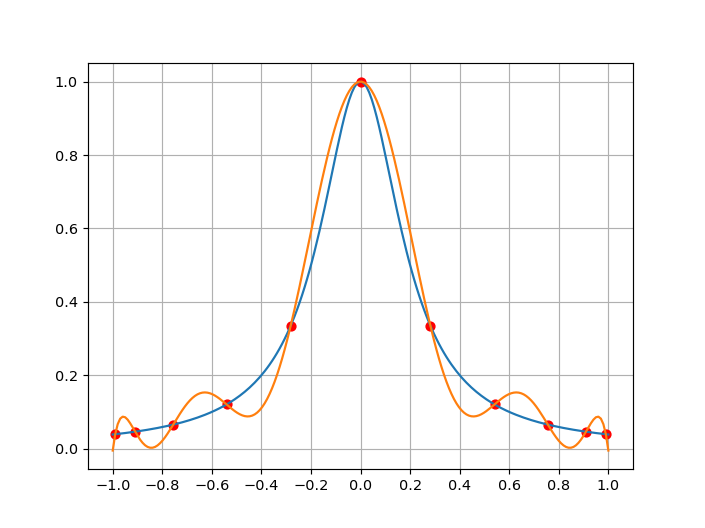

In [13]:
plt.figure(7)
for i in range(npts):
    ww[i] = fs[0 ]*pol[0].subs([(x, xx[i])]) + fs[1]*pol[1].subs([(x, xx[i])]) \
          + fs[2 ]*pol[2].subs([(x, xx[i])]) + fs[3]*pol[3].subs([(x, xx[i])]) \
          + fs[4 ]*pol[4].subs([(x, xx[i])]) + fs[5]*pol[5].subs([(x, xx[i])]) \
          + fs[6 ]*pol[6].subs([(x, xx[i])]) + fs[7]*pol[7].subs([(x, xx[i])]) \
          + fs[8 ]*pol[8].subs([(x, xx[i])]) + fs[9]*pol[9].subs([(x, xx[i])]) \
          + fs[10]*pol[10].subs([(x, xx[i])])
    zz[i]=fx(xx[i])
    
plt.xticks(np.arange(min(xx), max(xx)+1, 0.2))
plt.grid()
plt.plot(xs, fs, 'ro')
plt.plot(xx, zz)
plt.plot(xx, ww)

#### Local scheme

The polynomials are jus now locally defined linear functions.

<IPython.core.display.Javascript object>


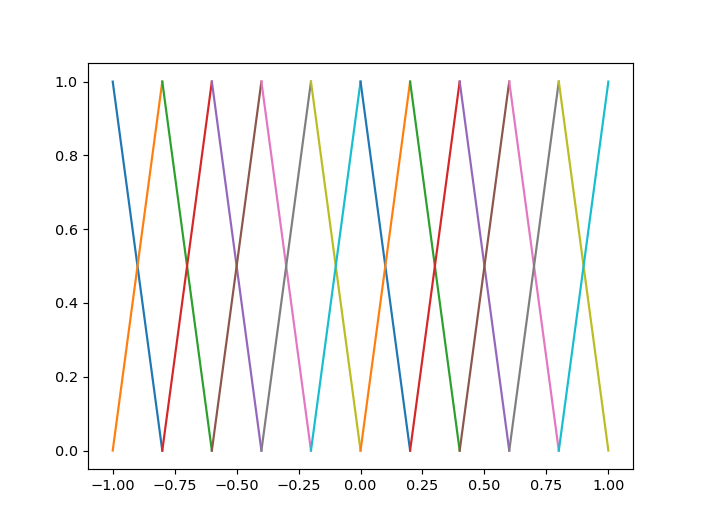

In [14]:
plt.figure(8)
neles = 10
xcon = np.zeros((neles , 2))
xl   = np.zeros((neles+1))
XI   = -1.0
XF   = +1.0
dx =  0.2
for i in range(neles):
    xcon[i , 0] = XI+i*dx
    xl[i] = xcon[i , 0]
    xcon[i , 1] = xcon[i , 0] + dx
xl[neles] = XF
#
pol = []
for i in range(neles):
    xi = xcon[i , 0]
    xf = xcon[i , 1]
    pol.append(sym.simplify(LagrangPoly(x, 1, 0, [xi , xf])))
    pol.append(sym.simplify(LagrangPoly(x, 1, 1, [xi , xf])))
nptsl = 10
for j in range(neles):
    xi = xcon[j , 0]
    xf = xcon[j , 1]    
    xp = np.linspace(xi , xf , nptsl)
    yp = np.zeros(nptsl)
    for k in range(2):
        for i in range(nptsl):
            yp[i] =  pol[k+2*j].subs([(x, xp[i])])
        plt.plot(xp, yp)

The resulting function is now piecewise continuous.

<IPython.core.display.Javascript object>


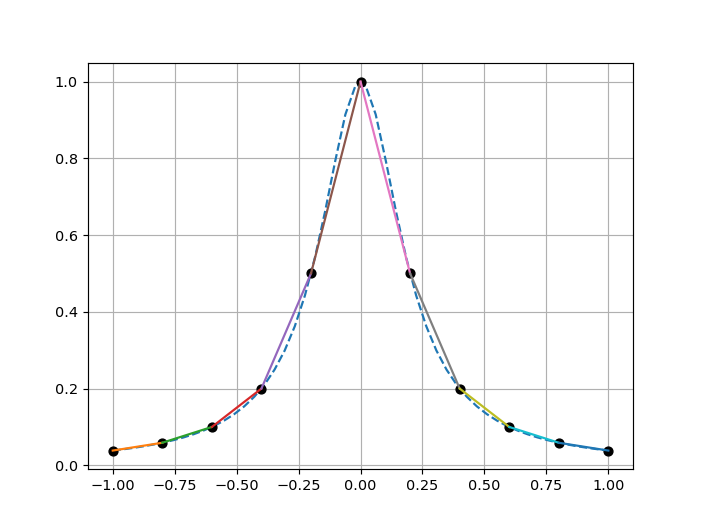

In [15]:
plt.figure(9)
plt.grid()
x= sym.symbols('x')
fx = lambda x: 1.0/(1.0+25.0*x*x)
npts = 50
xx = np.linspace(-1, 1, npts)
yr = np.array(fx(xx))
plt.plot(xx , yr , '--')

fd = np.array(fx(xl))
plt.plot(xl , fd , 'ko')
#
xp = np.linspace(-1.0, -0.8, nptsl)
yp = np.zeros(nptsl)
for i in range(nptsl):
    yp[i] = fd[0]*pol[0].subs([(x, xp[i])]) + fd[1]*pol[1].subs([(x, xp[i])])
plt.plot(xp, yp)
#
for j in range(1 , neles):
    xi = xcon[j , 0]
    xf = xcon[j , 1]    
    xp = np.linspace(xi , xf , nptsl)
    yp = np.zeros(nptsl)
    for i in range(nptsl):
        yp[i] = fd[j]*pol[2*j].subs([(x, xp[i])]) + fd[j+1]*pol[2*j+1].subs([(x, xp[i])])
    plt.plot(xp, yp)

#### Problem 3
Using an independent script or a notebook implement a local interpolation scheme using a canonical element of size 2.0 and use it to approximate the Runge function discussed in the class notes.

In [16]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()